<a href="https://colab.research.google.com/github/anderson-perez/Aulas-de-IEC/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes CNN - Convolutional Neural Network

In [1]:
from keras.datasets import mnist

In [2]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_treino.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
import matplotlib.pyplot as plt

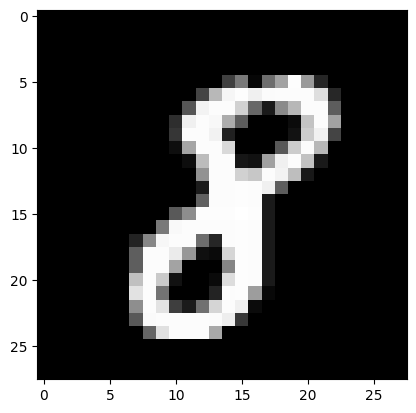

In [8]:
plt.imshow(X_treino[445], cmap='gray')

In [9]:
y_treino[0]

np.uint8(5)

# Preparação dos dados

In [10]:
from keras.utils import to_categorical

In [11]:
# Preparar os dados de saída
y_treino = to_categorical(y_treino, 10)
y_teste = to_categorical(y_teste, 10)

In [12]:
y_treino[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
X_treino.max(), X_treino.min()

(np.uint8(255), np.uint8(0))

In [16]:
X_treino = X_treino / 255
X_teste = X_teste / 255

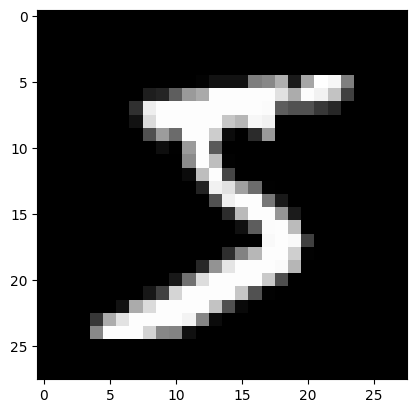

In [17]:
plt.imshow(X_treino[0], cmap='gray')

# Criação do Modelo (CNN)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [36]:
rna = Sequential()

In [37]:
rna.add(Conv2D(32, (2,2), input_shape=(28, 28, 1), activation='relu'))

In [38]:
rna.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
rna.add(Flatten())

In [40]:
rna.add(Dense(64, activation='relu'))
rna.add(Dense(10, activation='softmax'))

In [41]:
rna.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
rna.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,986 (1.32 MB)

 Trainable params: 346,986 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
rna.fit(X_treino, y_treino, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8892 - loss: 0.3842
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9768 - loss: 0.0762
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9853 - loss: 0.0483
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9895 - loss: 0.0352
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9925 - loss: 0.0240
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9941 - loss: 0.0185
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9953 - loss: 0.0141
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9976 - loss: 0.0079
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9978 - loss: 0.0069


In [44]:
avaliacao = rna.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0768


In [46]:
print(f"Acurácia...........: {avaliacao[1]}")
print(f"Loss...............: {avaliacao[0]}")

Acurácia...........: 0.9839000105857849
Loss...............: 0.06209193542599678


In [47]:
y_pred = rna.predict(X_teste[0].reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [49]:
y_pred.argmax()

np.int64(7)

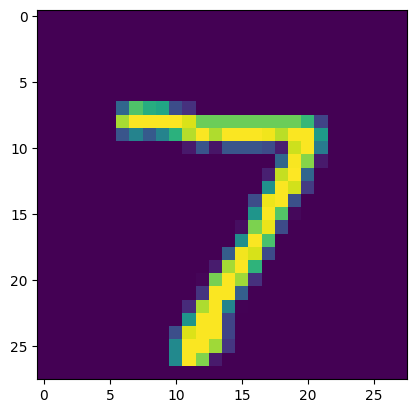

In [50]:
plt.imshow(X_teste[0])